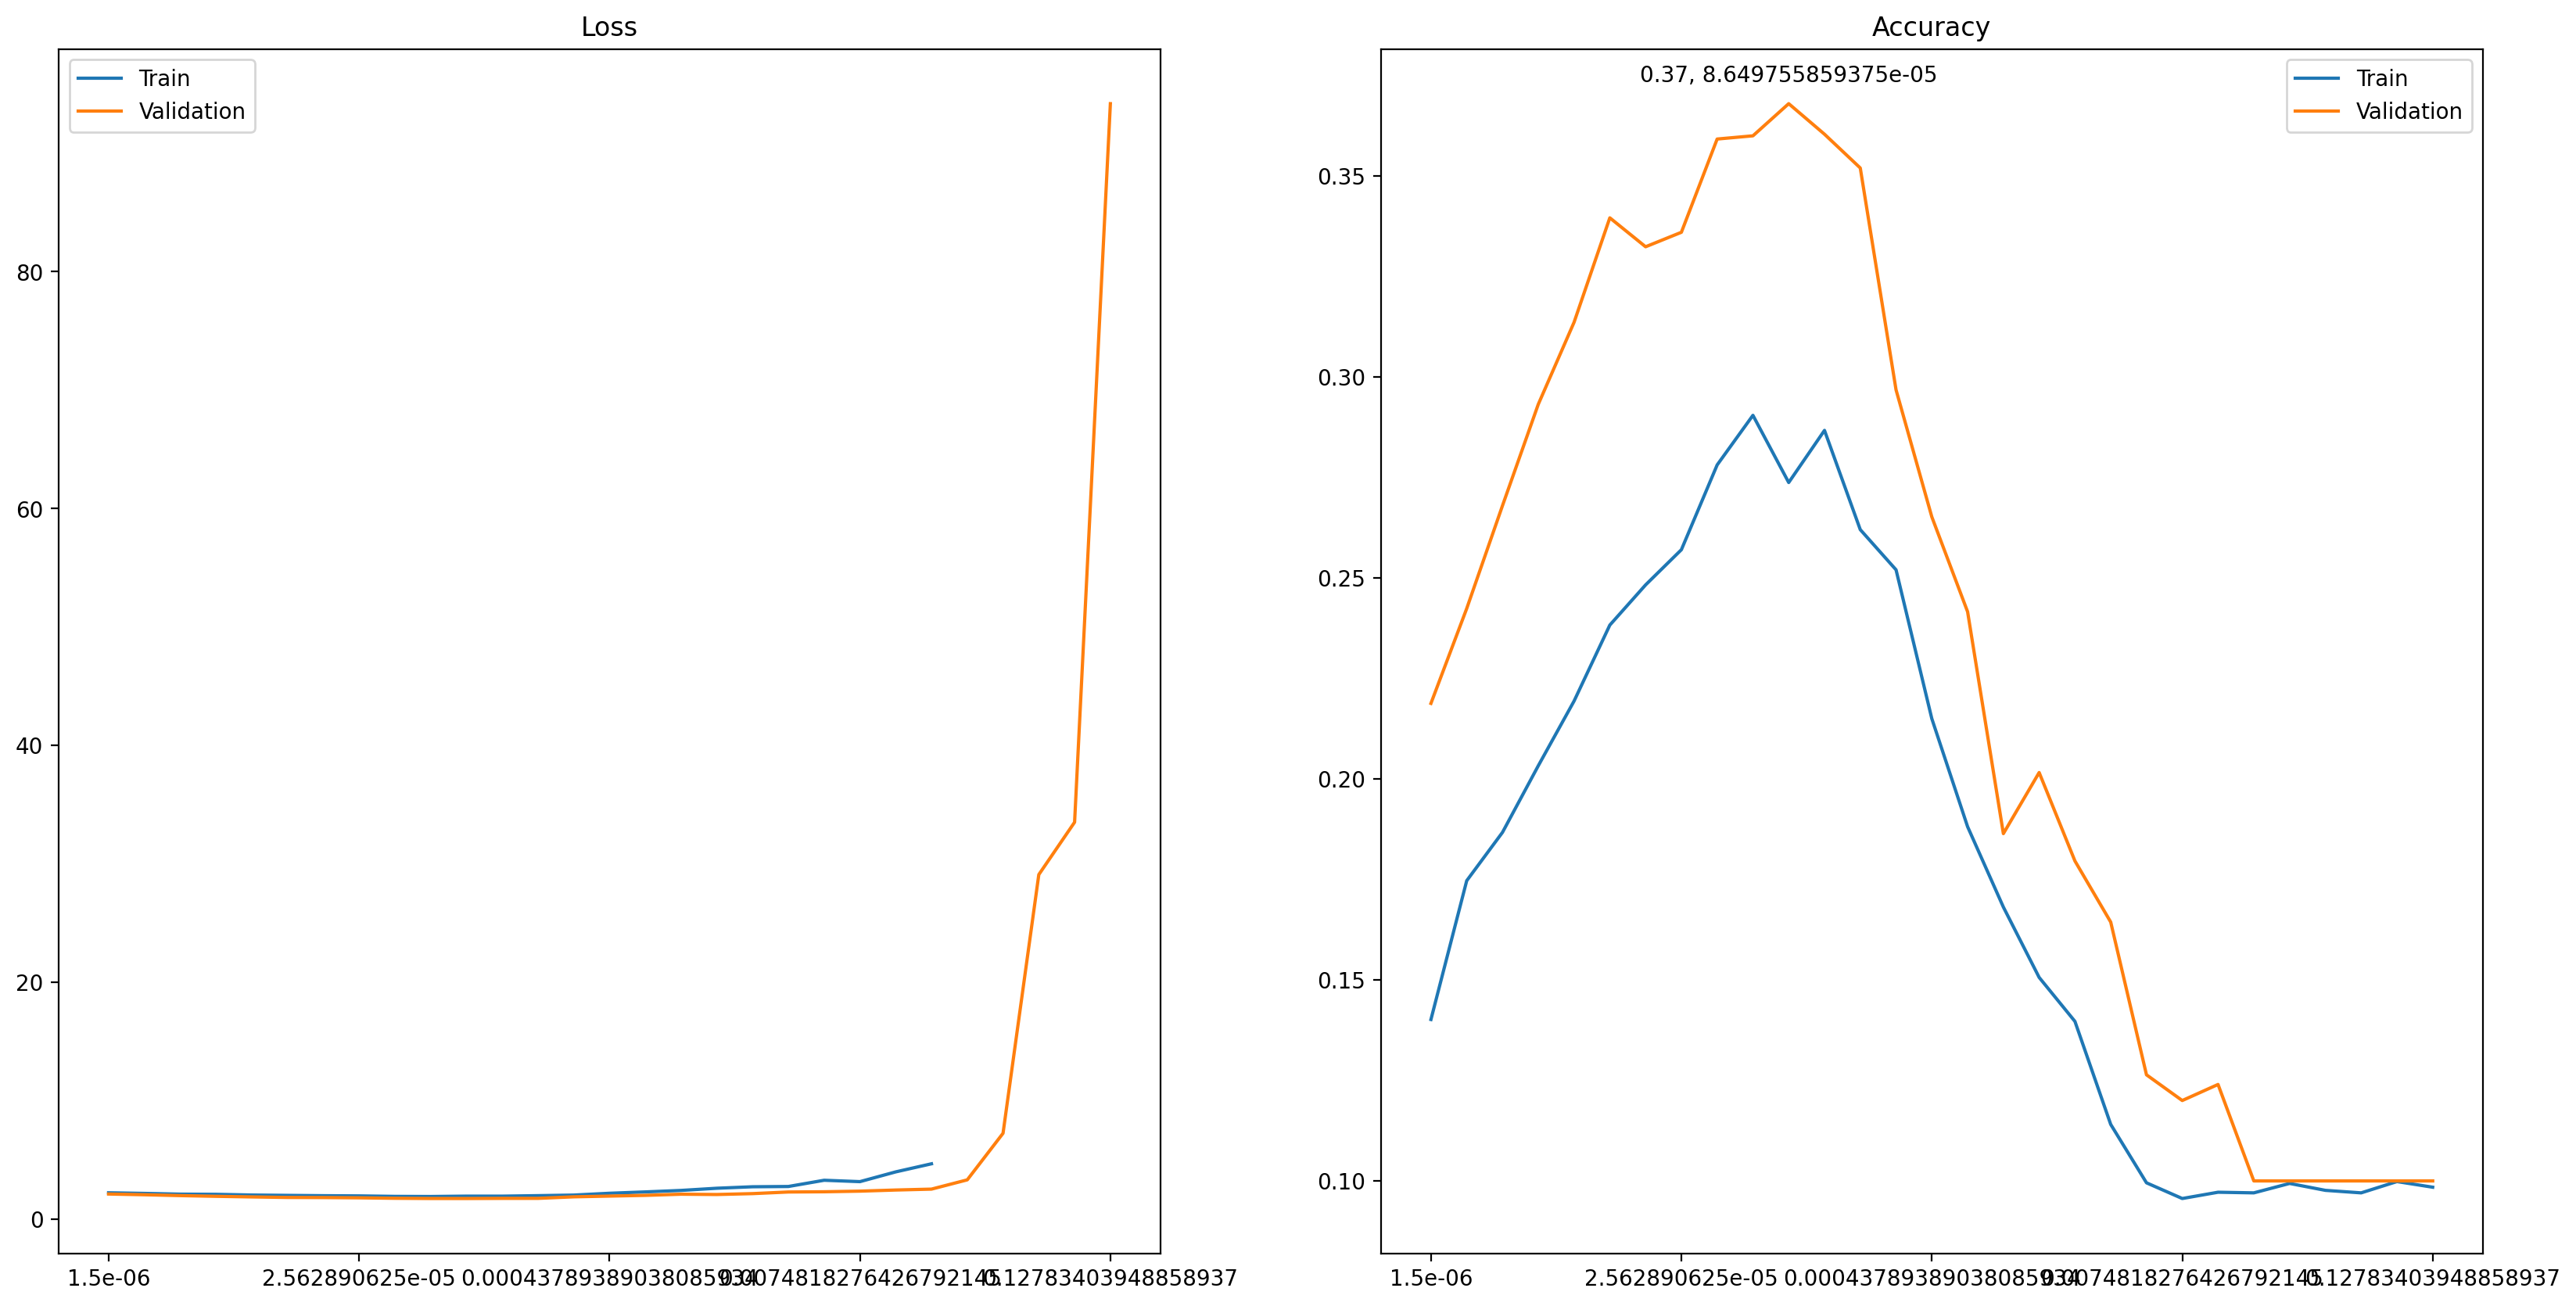

In [24]:

import json
import matplotlib.pyplot as plt
import os
import numpy as np

exp_name = './results/lr_test'
# time_stamp = '2024-04-07_02_33_41_858190_good'
# time_stamp = '2024-04-12_14_04_54_813794_adamw2'
time_stamp = '2024-04-12_16_08_49_421947'

# new_dir = f'{exp_name}/{time_stamp}'
models = ['swin_t']


for j, model_type in enumerate(models):

    new_dir = f'{exp_name}/{time_stamp}'

    os.makedirs(new_dir, exist_ok=True)

    f_name = f'results_{model_type}'


    results_dict = json.load(open(f'{new_dir}/{f_name}.json', 'r'))


    lr_list = list(results_dict.keys())
    lr_list = sorted(list(map(float, lr_list)))
    lr_list = list(map(str, lr_list))
    train_loss = [results_dict[lr]['train_loss'][-1] for lr in lr_list]
    train_acc = [max(results_dict[lr]['train_acc'])  for lr in lr_list]
    val_loss = [results_dict[lr]['val_step_loss'][-1]  for lr in lr_list]
    val_acc = [max(results_dict[lr]['val_step_acc'])  for lr in lr_list]
    lr_list = list(map(float, lr_list))

    # subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=200)
    ax[0].set_title('Loss')
    ax[0].plot(train_loss, label='Train')
    ax[0].plot(val_loss, label='Validation')
    ax[0].legend()


    ax[1].set_title('Accuracy')
    ax[1].plot(train_acc, label='Train')
    ax[1].plot(val_acc, label='Validation')
    ax[1].legend()

    # change ticks
    reduce_size = len(lr_list)//4
    ax[0].set_xticks(range(len(lr_list))[::reduce_size], labels=lr_list[::reduce_size])
    ax[1].set_xticks(range(len(lr_list))[::reduce_size], labels=lr_list[::reduce_size])

    # label the maximum val acc 
    max_val_acc = max(val_acc)
    max_val_acc_idx = np.argmax(val_acc)
    ax[1].annotate(f'{max_val_acc:.2f}, {lr_list[max_val_acc_idx]}', (max_val_acc_idx, max_val_acc), textcoords='offset points', xytext=(0, 10), ha='center')


    fig.savefig(f'{exp_name}/{time_stamp}/{f_name}.png')
    # plt.savefig(f'./lr_test/{time_stamp}/{f_name}.png')
    plt.show()

In [28]:
for n in lr_list[::reduce_size]:
    print(round(n, 5))
    # print(n)

1.5e-06
2.562890625e-05
0.00043789389038085934
0.0074818276426792145
0.12783403948858937


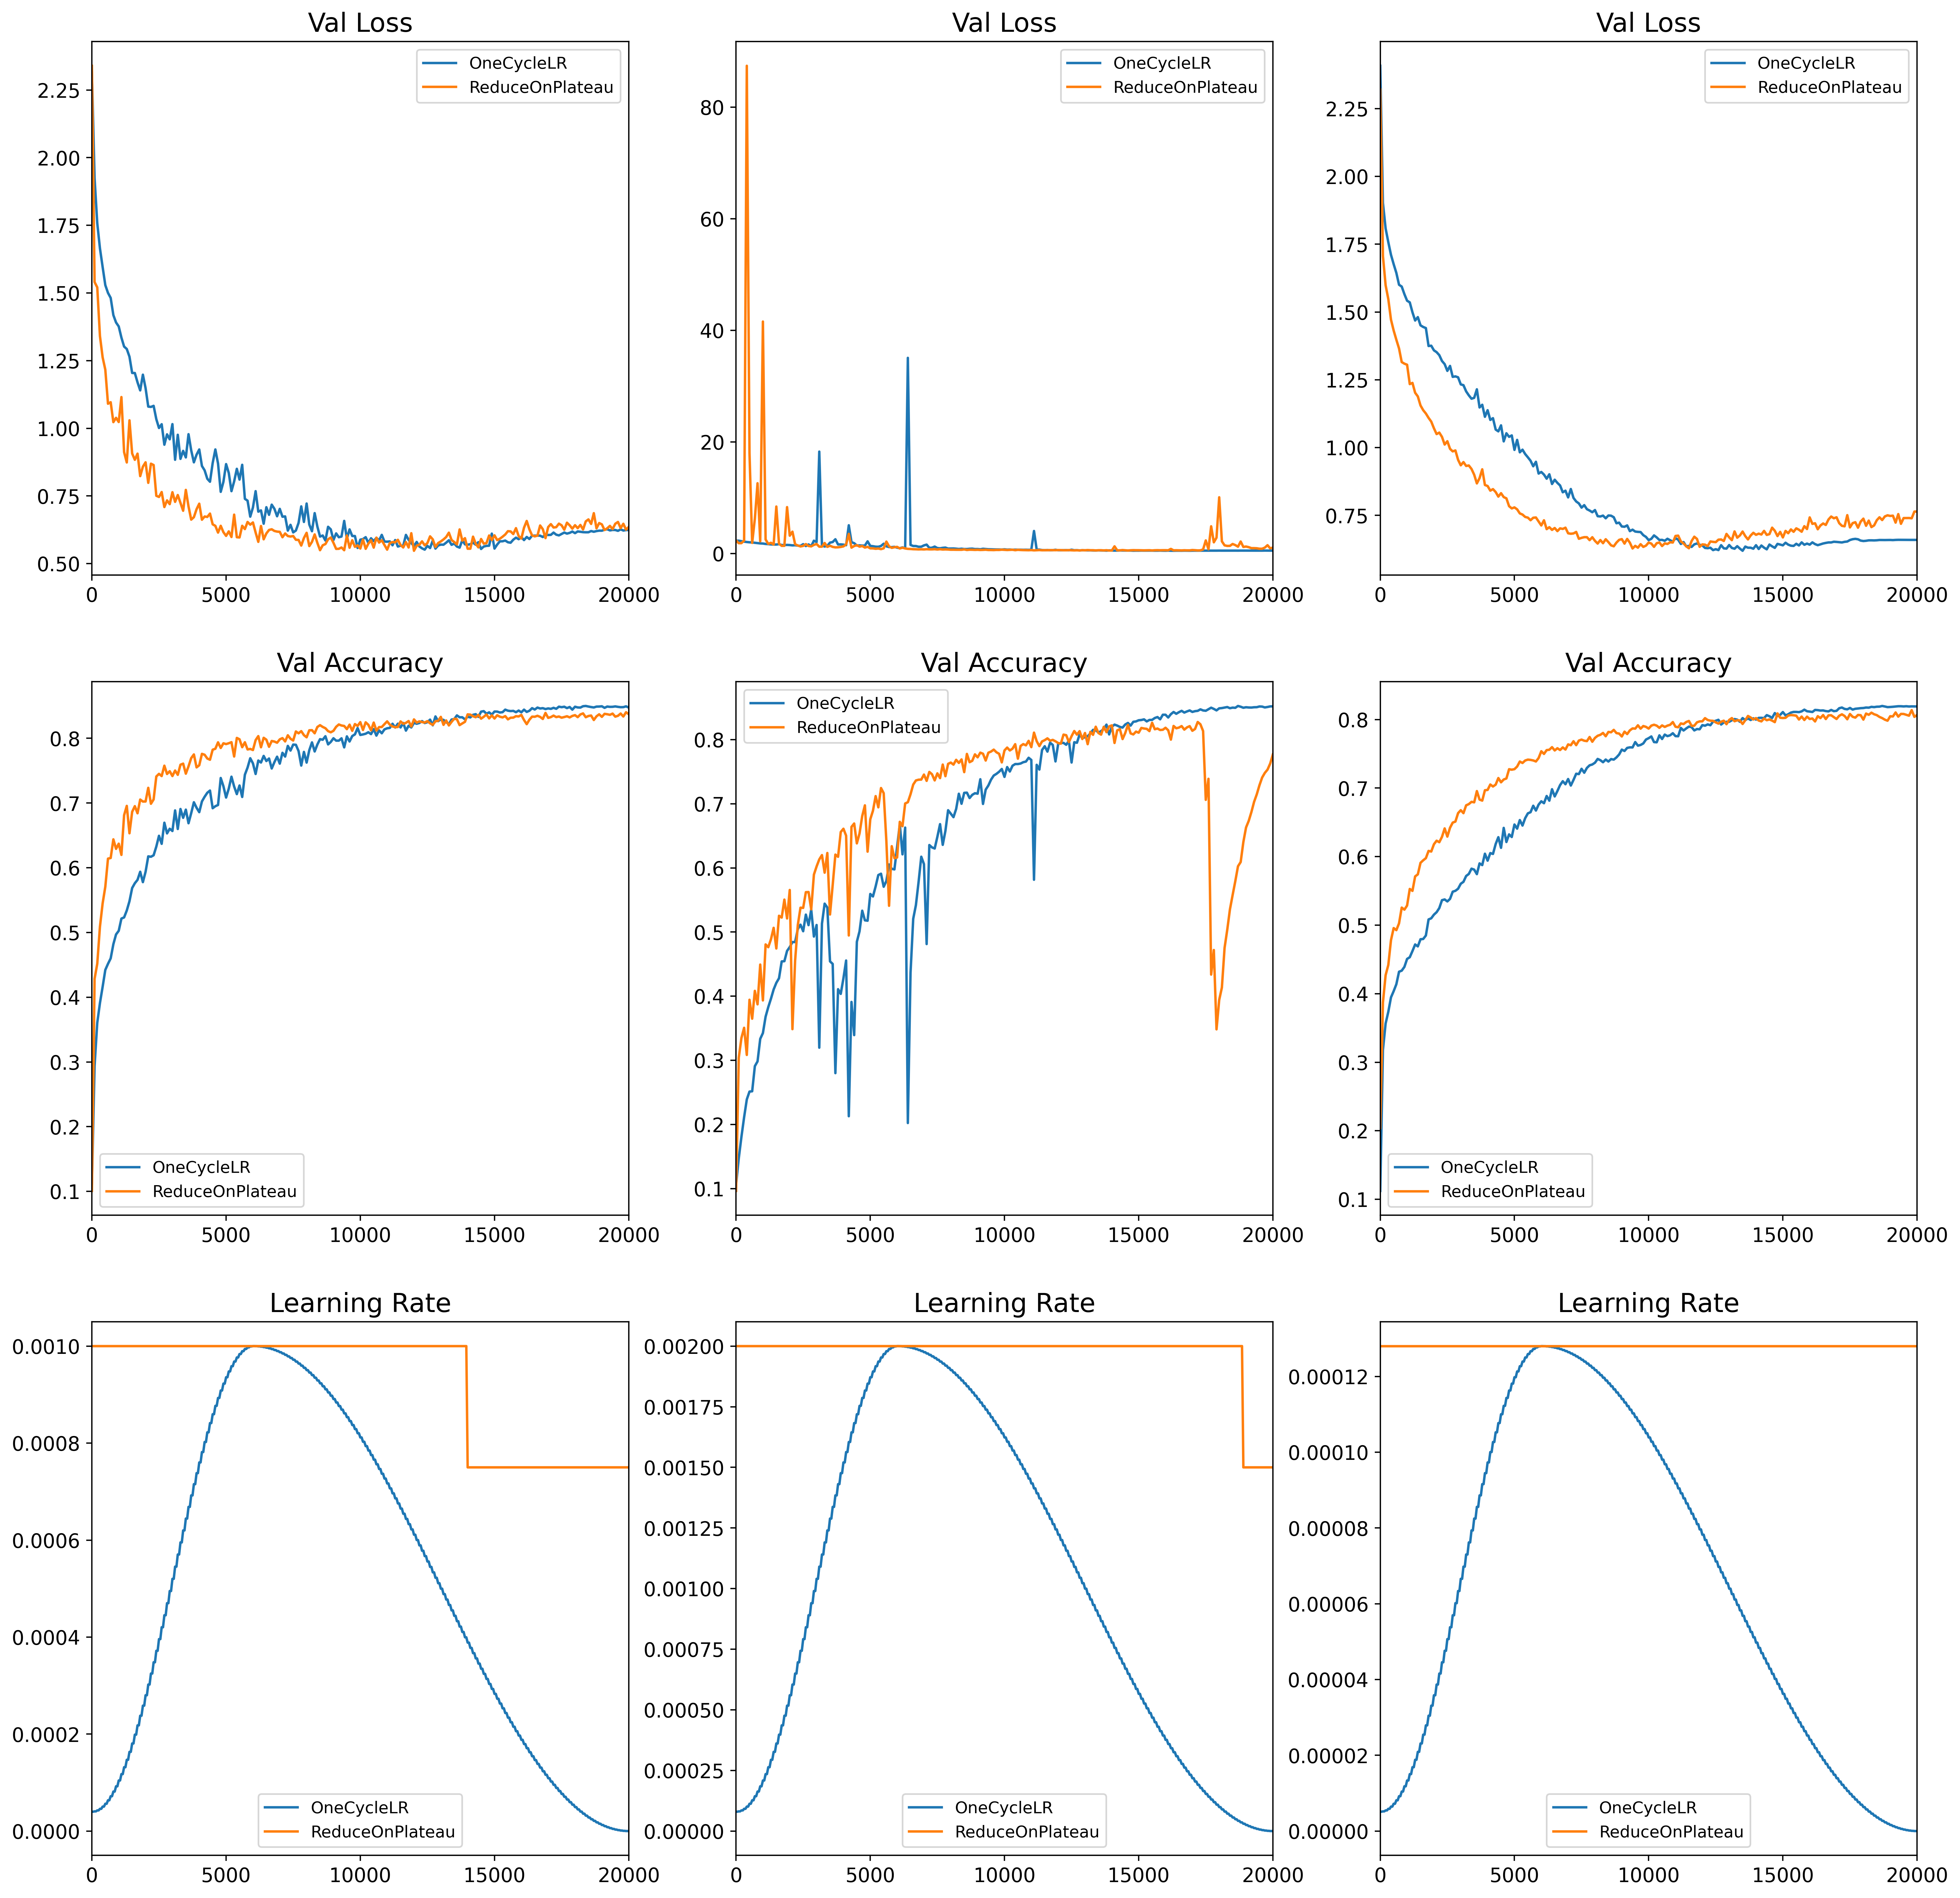

<Figure size 2400x1000 with 0 Axes>

<Figure size 2400x1000 with 0 Axes>

<Figure size 2400x1000 with 0 Axes>

In [31]:
import json
import matplotlib.pyplot as plt
import os
exp_name = './results/training'
# time_stamp = '2024-04-07_02_33_41_858190_good'
# time_stamp = '2024-04-07_03_34_38_589954_good'
# time_stamp = '2024-04-12_15_14_16_908607_adam_large'
time_stamp = '2024-04-12_16_40_26_370124_adam_large_rep'

new_dir = f'./{exp_name}/{time_stamp}'
models = ['resnet18', 'resnet50', 'swin_t']

fig, ax = plt.subplots(3, len(models), figsize=(20, 20), dpi=400, )

for j, f_name in enumerate(models):

    results_dict = json.load(open(f'{new_dir}/results_{f_name}.json', 'r'))

    figure = plt.figure(figsize=(12, 5), dpi=200)

    scheduler_type_list = sorted(list(results_dict.keys()))


    # subplots
    ax[0, j].set_title('Val Loss', fontsize=16)
    # ax[0, j].set_ylabel('Val Loss', fontsize=16)
    # ax[0, j].set_xlabel('Step', fontsize=16)
    for i, sch in enumerate(scheduler_type_list):
        ax[0, j].plot(results_dict[sch]['val_step_loss'], label=sch)
    ax[0, j].legend()
    ax[0, j].set_xlim(0, 200)
    ax[0, j].set_xticks([tick for tick in ax[0, j].get_xticks()][::2], labels=[f'{int(tick)*100}' for tick in ax[0, j].get_xticks()][::2])



    ax[1, j].set_title('Val Accuracy', fontsize=16)
    # ax[1, j].set_ylabel('Val Accuracy', fontsize=16)
    # ax[1, j].set_xlabel('Step', fontsize=16)
    for i, sch in enumerate(scheduler_type_list):
        ax[1, j].plot(results_dict[sch]['val_step_acc'], label=sch)
    ax[1, j].legend()
    ax[1, j].set_xlim(0, 200)
    ax[1, j].set_xticks([tick for tick in ax[1, j].get_xticks()][::2], labels=[f'{int(tick)*100}' for tick in ax[1, j].get_xticks()][::2])
    



    ax[2, j].set_title('Learning Rate', fontsize=16)
    # ax[2, j].set_ylabel('Learning Rate', fontsize=16)
    # ax[2, j].set_xlabel('Step', fontsize=16)
    for i, sch in enumerate(scheduler_type_list):
        ax[2, j].plot(results_dict[sch]['lr'], label=sch)
    ax[2, j].legend()
    ax[2, j].set_xlim(0, 400)
    # ax[2, j].set_xticks([tick for tick in ax[2, j].get_xticks()], labels=[f'{int(tick//2)}' for tick in ax[2, j].get_xticks()])
    ax[2, j].set_xticks([tick for tick in ax[2, j].get_xticks()][::2], labels=[f'{int(tick//2)*100}' for tick in ax[2, j].get_xticks()][::2])


    # Set fontsize for axis labels
    for axis in ax[:, j]:
        axis.tick_params(axis='both', which='major', labelsize=12)
    # plt.savefig(f'./lr_test/{time_stamp}/{f_name}.png')
plt.show()


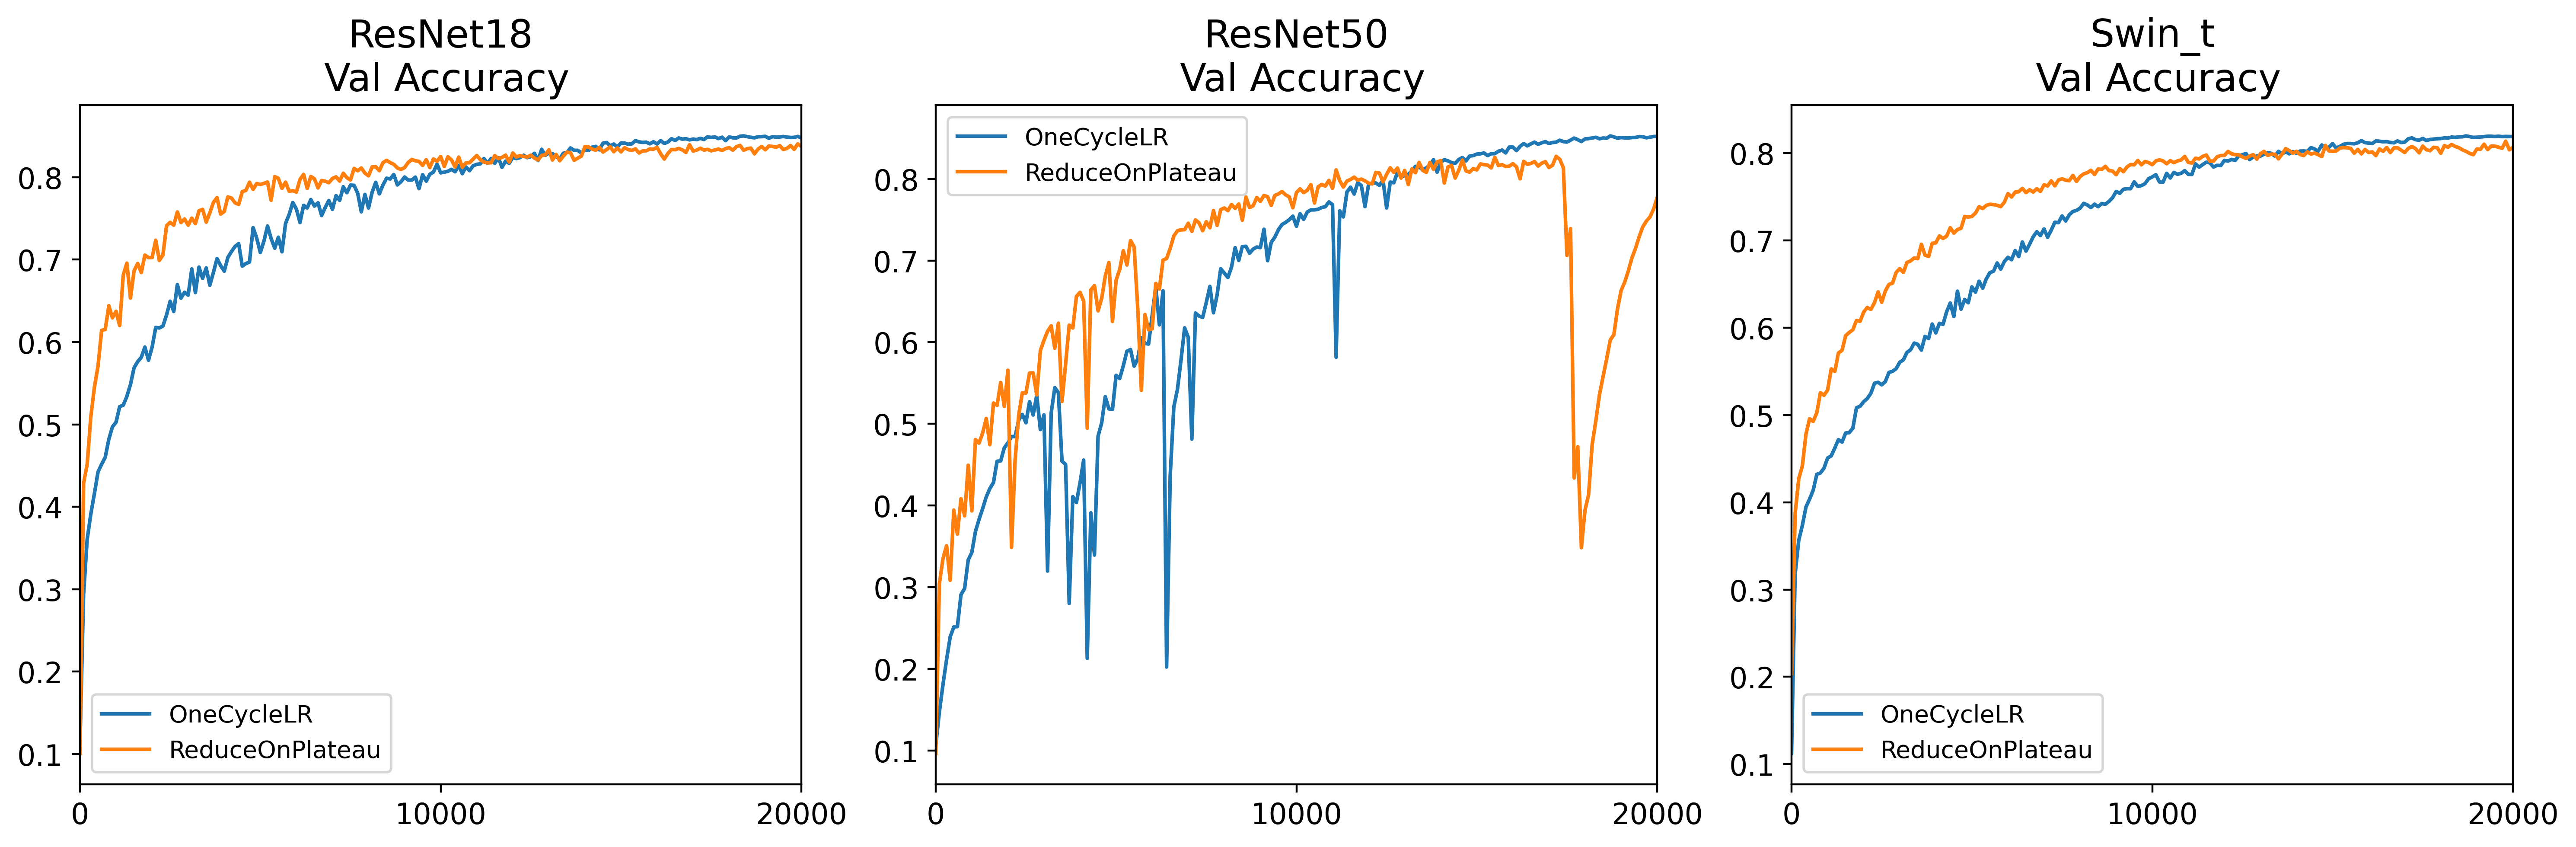

In [50]:
import json
import matplotlib.pyplot as plt
import os
exp_name = './results/training'
# time_stamp = '2024-04-07_02_33_41_858190_good'
time_stamp = '2024-04-07_03_34_38_589954_good'
time_stamp = '2024-04-12_16_40_26_370124_adam_large_rep'
time_stamp = '2024-04-12_17_29_14_506809_adam_small_rep'

new_dir = f'./{exp_name}/{time_stamp}'
models = ['resnet18', 'resnet50', 'swin_t']

mnames = ['ResNet18', 'ResNet50', 'Swin_t']

fig, ax = plt.subplots(1, len(models), figsize=(15, 5), dpi=400, )

for j, f_name in enumerate(models):

    results_dict = json.load(open(f'{new_dir}/results_{f_name}.json', 'r'))

    # figure = plt.figure(figsize=(10, 5), dpi=200)

    scheduler_type_list = sorted(list(results_dict.keys()))






    ax[ j].set_title(f'{mnames[j]}\n Val Accuracy', fontsize=16)
    # set another title

    # ax[ j].set_ylabel('Val Accuracy', fontsize=16)
    # ax[ j].set_xlabel('Step', fontsize=16)
    for i, sch in enumerate(scheduler_type_list):
        ax[ j].plot(results_dict[sch]['val_step_acc'], label=sch)
    ax[ j].legend()
    ax[ j].set_xlim(0, 200)
    # Set fontsize for axis labels
    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=12)
    ax[ j].set_xticks([tick for tick in ax[j].get_xticks()][::2], labels=[f'{int(tick)*100}' for tick in ax[j].get_xticks()][::2])


    # ax[j].set_title('Learning Rate', fontsize=16)
    # # ax[j].set_ylabel('Learning Rate', fontsize=16)
    # # ax[j].set_xlabel('Step', fontsize=16)
    # for i, sch in enumerate(scheduler_type_list):
    #     ax[j].plot(results_dict[sch]['lr'], label=sch)
    # ax[j].legend()
    # ax[j].set_xlim(0, 400)
    # ax[j].set_xticks([tick for tick in ax[j].get_xticks()][::2], labels=[f'{int(tick//2)*100}' for tick in ax[ j].get_xticks()][::2])

    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=12)


    # plt.savefig(f'./lr_test/{time_stamp}/{f_name}.png')
# crop border
fig.tight_layout()
fig.savefig(f'./present_{time_stamp}.png')

plt.show()


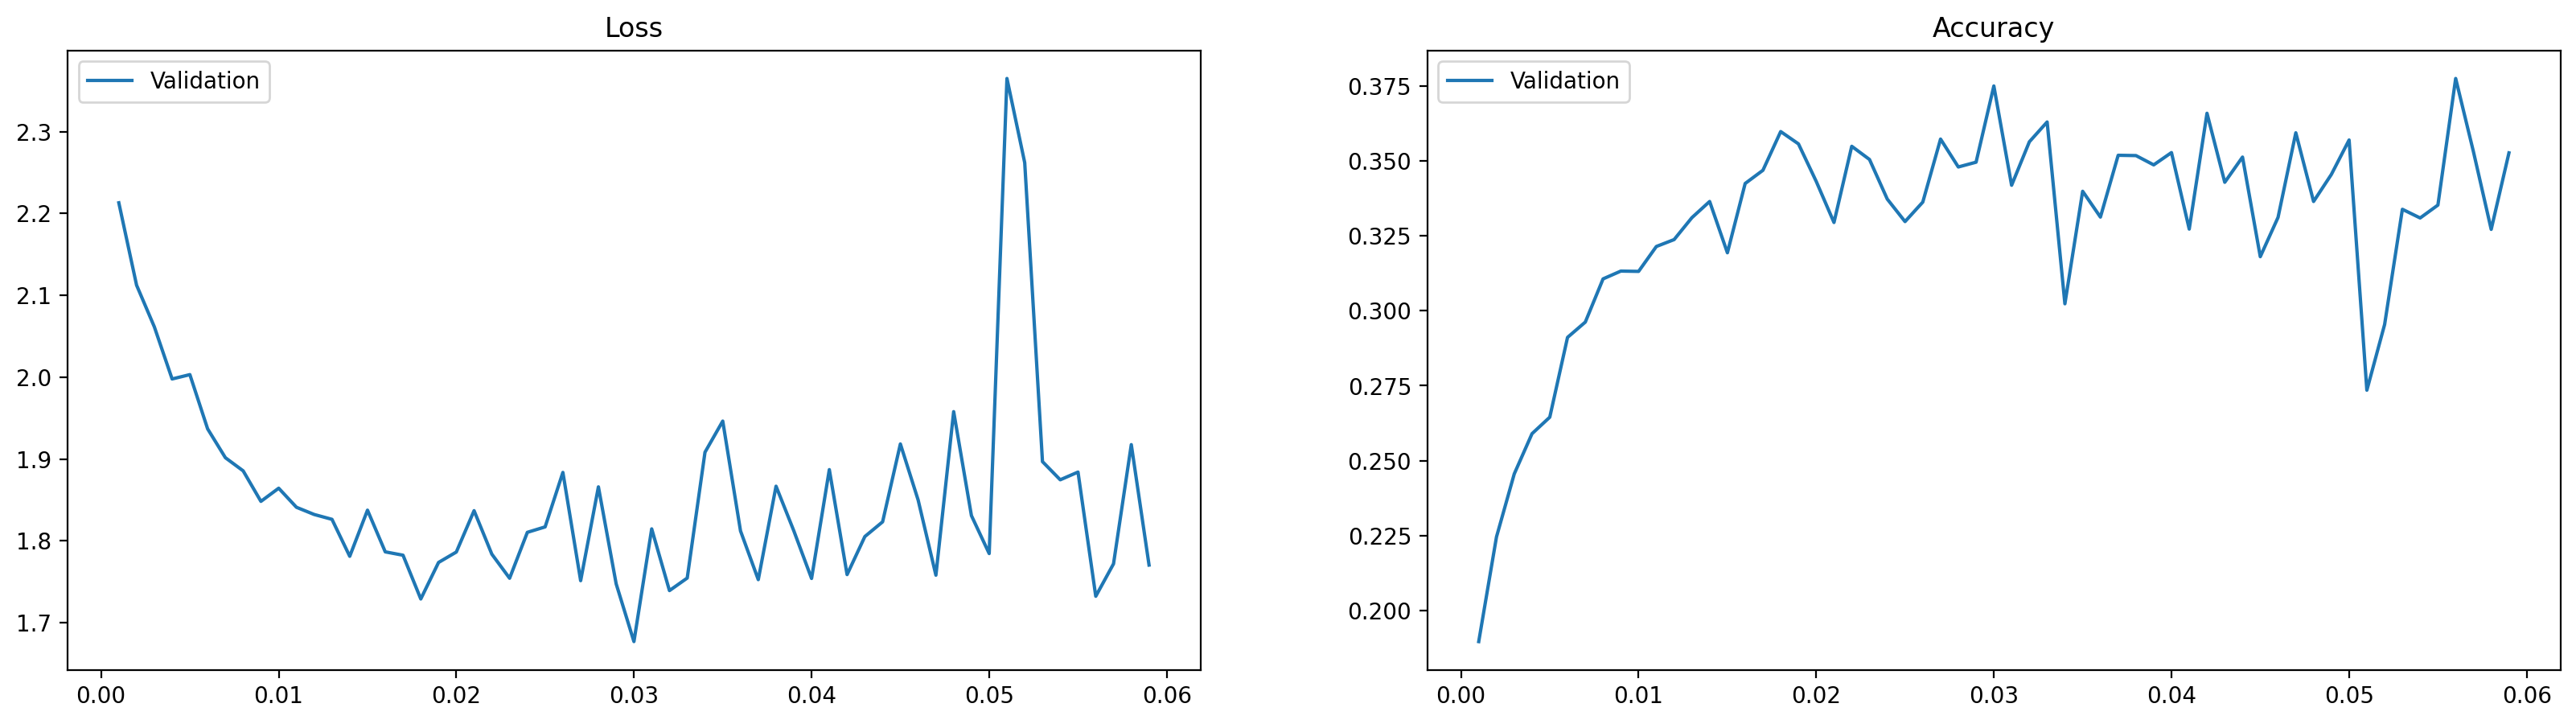

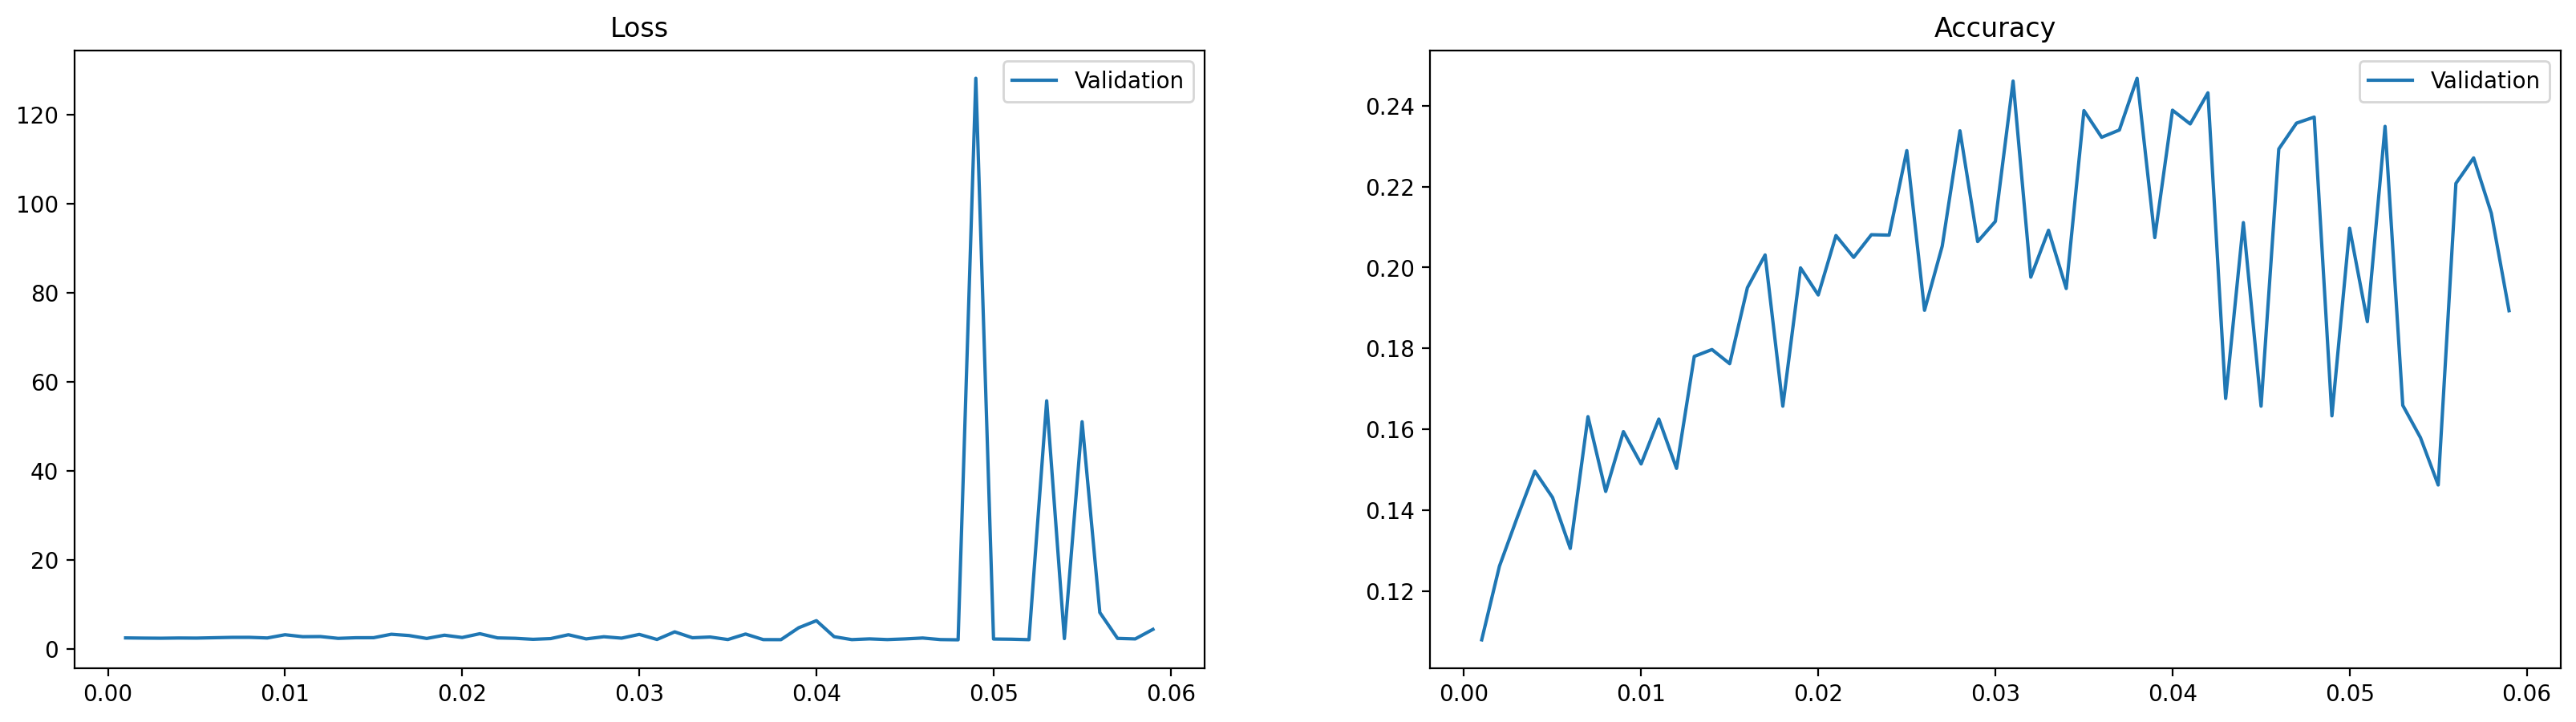

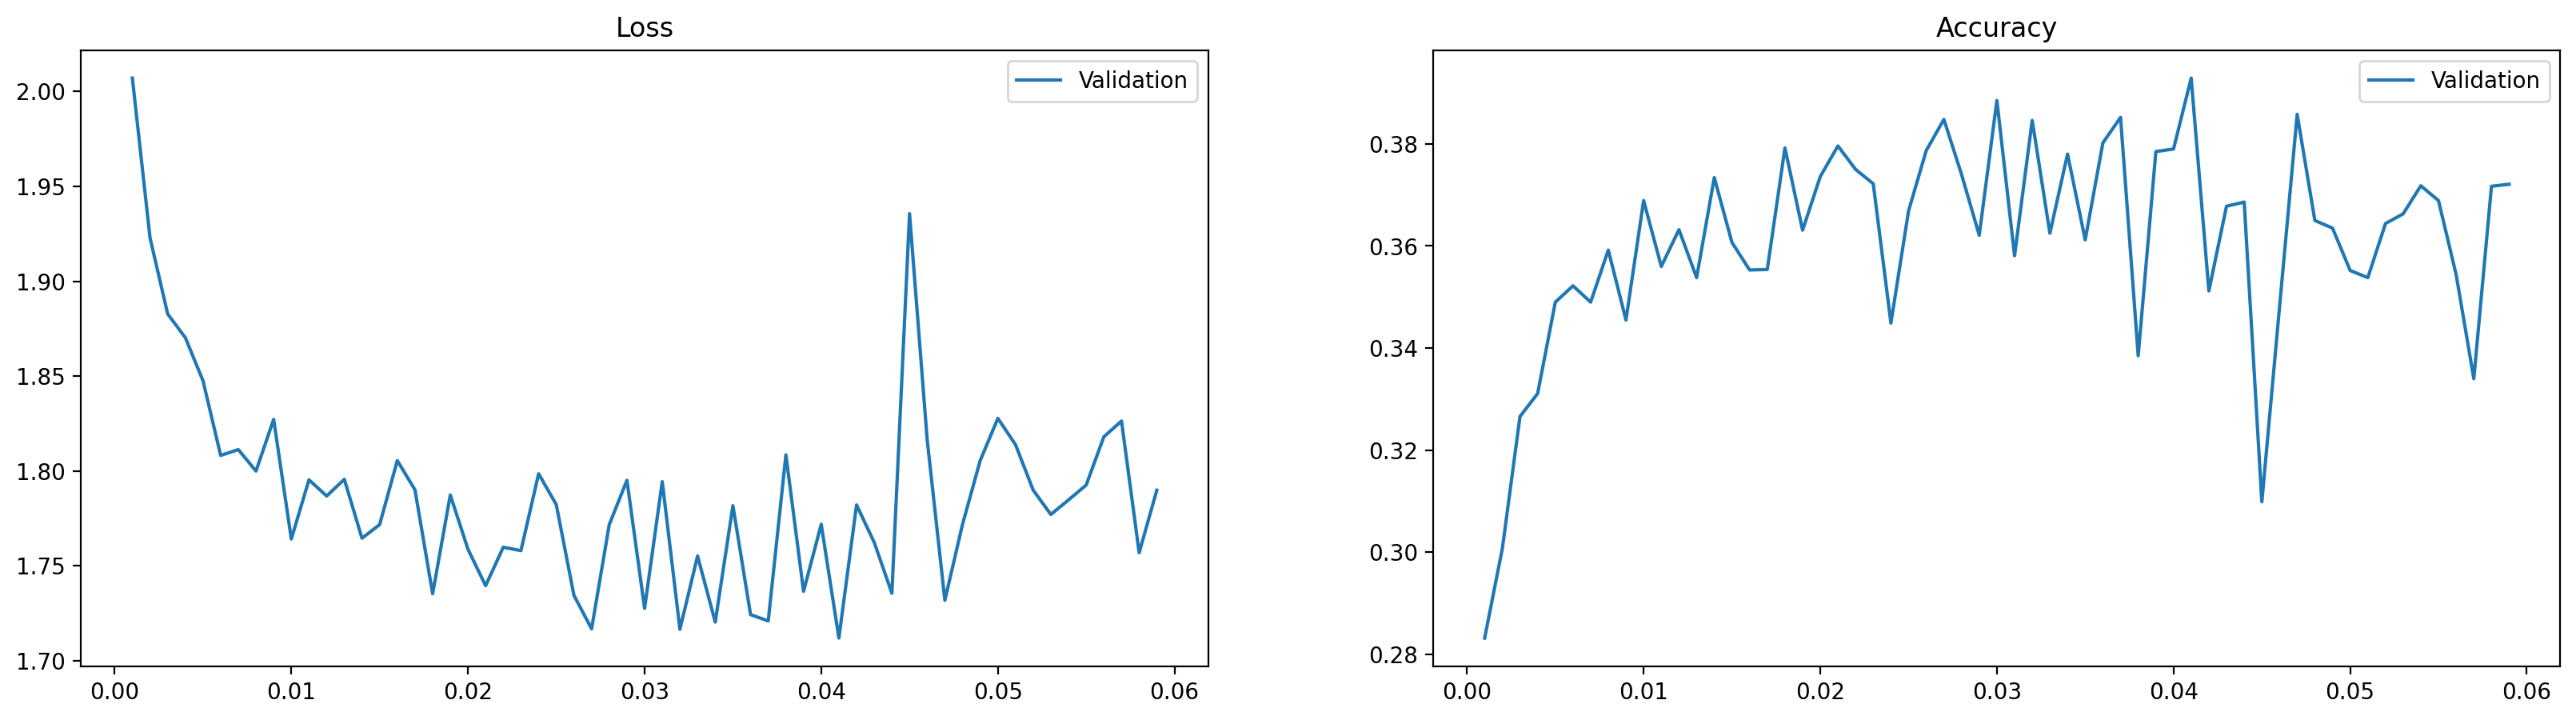

In [66]:
import json
import matplotlib.pyplot as plt
import os
exp_name = './results/lr_test'
time_stamp = '2024-04-07_01_55_01_636329_good'

new_dir = f'./{exp_name}/{time_stamp}'
models = ['resnet18', 'resnet50', 'swim_t']


for j, f_name in enumerate(models):

    results_dict = json.load(open(f'{new_dir}/results_{f_name}.json', 'r'))

    
    lr_list = sorted(list(results_dict.keys()))
    train_loss = [results_dict[lr]['train_loss'][-1] for lr in lr_list]
    train_acc = [max(results_dict[lr]['train_acc'])  for lr in lr_list]
    val_loss = [results_dict[lr]['val_step_loss'][-1]  for lr in lr_list]
    val_acc = [max(results_dict[lr]['val_step_acc'])  for lr in lr_list]
    lr_list = list(map(float, lr_list))

    # subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), dpi=200)
    ax[0].set_title('Loss')
    # ax[0].plot(lr_list, train_loss, label='Train')
    ax[0].plot(lr_list, val_loss, label='Validation')
    ax[0].legend()


    ax[1].set_title('Accuracy')
    # ax[1].plot(lr_list, train_acc, label='Train')
    ax[1].plot(lr_list, val_acc, label='Validation')
    ax[1].legend()

    # fig.savefig(f'{exp_name}/{time_stamp}/{f_name}.png')
    # plt.savefig(f'./lr_test/{time_stamp}/{f_name}.png')
plt.show()

    # figure = plt.figure(figsize=(10, 5), dpi=200)

    # scheduler_type_list = sorted(list(results_dict.keys()))






    # ax[j].set_xticks([tick for tick in ax[j].get_xticks()][::2], labels=[f'{int(tick//2)*100}' for tick in ax[ j].get_xticks()][::2])

    # for axis in ax:
    #     axis.tick_params(axis='both', which='major', labelsize=12)

